In [46]:
df = pd.read_hdf('/Users/klay6683/data/iuvs/dark_stuff/results_df.h5', 'df')

In [47]:
df = meta.clean_up_dark_scan(df)

In [57]:
df.head()

,ANC_SVN_REVISION,BIN_PATTERN_INDEX,BIN_TBL,CADENCE,CASE_TEMP,CHANNEL,CODE_SVN_REVISION,COLLECTION_ID,DET_TEMP,DUTY_CYCLE,...,ORBIT_NUMBER,PROCESS,PRODUCT_ID,SOLAR_LONGITUDE,SW_VER,TARGET_NAME,mean,median,std,BINNING_SET
TIME_OF_INT,,,,,,,,,,,,,,,,,,,,,
2013-12-04 19:02:17.420740,998,LINEAR FlightCheckout131204.prc,"LINEAR 3,3 FlightCheckout131204.prc",2,14456,FUV,NaN,cruise,2351,1,...,0,2015/132 May 12 21:24:17.00000UTC,mvn_iuv_l1a_checkout-fuvdark_20131204T190217_v...,58.333862,NaN,C/2012 S1 (ISON),241.076477,229,75.493331,"(0, 8, 0, 8)"
2013-12-04 19:02:17.420740,998,LINEAR FlightCheckout131204.prc,"LINEAR 3,3 FlightCheckout131204.prc",2,14456,MUV,NaN,cruise,2402,1,...,0,2015/132 May 12 21:30:46.00000UTC,mvn_iuv_l1a_checkout-muvdark_20131204T190217_v...,58.333862,NaN,C/2012 S1 (ISON),213.668213,202,66.896731,"(0, 8, 0, 8)"
2013-12-04 19:03:04.420770,998,LINEAR FlightCheckout131204.prc,"LINEAR 3,3 FlightCheckout131204.prc",2,14455,FUV,NaN,cruise,2351,1,...,0,2015/132 May 12 21:26:44.00000UTC,mvn_iuv_l1a_checkout-fuvdark_20131204T190304_v...,58.334099,NaN,C/2012 S1 (ISON),23373.713318,24218,6042.129036,"(0, 8, 0, 8)"
2013-12-04 19:03:04.420770,998,LINEAR FlightCheckout131204.prc,"LINEAR 3,3 FlightCheckout131204.prc",2,14455,MUV,NaN,cruise,2400,1,...,0,2015/132 May 12 21:30:52.00000UTC,mvn_iuv_l1a_checkout-muvdark_20131204T190304_v...,58.334099,NaN,C/2012 S1 (ISON),17524.360107,17720,4284.540316,"(0, 8, 0, 8)"
2014-04-25 00:07:44.265320,970,LINEAR RidealongIPH2,"LINEAR 8,9 RidealongIPH2",61,15825,FUV,NaN,cruise,2361,1,...,0,2015/126 May 06 22:45:44.00000UTC,mvn_iuv_l1a_IPH2-cycle00019-mode020-fuvdark_20...,121.203468,NaN,IPH,520.624687,436,348.122660,"(0, 2, 0, 4)"


In [58]:
df['orbit_segment'] = df.PRODUCT_ID.map(lambda x: x.split('_')[3].split('-')[0])

In [61]:
df[(df.NAXIS1==1024) & (df.NAXIS2==1024)].groupby('orbit_segment').size()

orbit_segment
APP2         5
IPH2        12
apoapse      8
inbound      8
outbound     8
periapse    16
dtype: int64

In [5]:
df[df.BIN_PATTERN_INDEX=='LINEAR linear_0006'].BIN_TBL.value_counts()

LINEAR 7,8 linear_0006      3495
LINEAR 5,6 linear_0006      3474
LINEAR 15,16 linear_0006    1664
LINEAR 17,18 linear_0006    1664
LINEAR 11,12 linear_0006     714
LINEAR 7,14 linear_0006      380
LINEAR 0,19 linear_0006       92
LINEAR 3,4 linear_0006        54
LINEAR 13,14 linear_0006      28
LINEAR 1,2 linear_0006         7
dtype: int64

In [6]:
three50_450 = df[(df.ORBIT_NUMBER>349) & (df.ORBIT_NUMBER<450)]
four50_550 = df[(df.ORBIT_NUMBER>449) & (df.ORBIT_NUMBER<550)]

In [7]:
three50_450.BIN_PATTERN_INDEX.value_counts()

LINEAR linear_0004    436
LINEAR linear_0005    266
dtype: int64

In [8]:
four50_550.BIN_PATTERN_INDEX.value_counts()

LINEAR linear_0006    5205
LINEAR linear_0005      36
LINEAR linear_0007       4
dtype: int64

Will be focusing on LINEAR linear_0006 for now, until I better understand how they compare.

In [9]:
df = df[df.BIN_PATTERN_INDEX == 'LINEAR linear_0006']
# now can drop that column
df = df.drop('BIN_PATTERN_INDEX', axis=1)

In [10]:
bin_tables = df.BIN_TBL.value_counts()
bin_tables

LINEAR 7,8 linear_0006      3495
LINEAR 5,6 linear_0006      3474
LINEAR 15,16 linear_0006    1664
LINEAR 17,18 linear_0006    1664
LINEAR 11,12 linear_0006     714
LINEAR 7,14 linear_0006      380
LINEAR 0,19 linear_0006       92
LINEAR 3,4 linear_0006        54
LINEAR 13,14 linear_0006      28
LINEAR 1,2 linear_0006         7
dtype: int64

In [11]:
for ind in bin_tables.index:
    print(ind)
    print(df[df.BIN_TBL==ind].orbit_segment.value_counts())

LINEAR 7,8 linear_0006
periapse    3495
dtype: int64
LINEAR 5,6 linear_0006
periapse    3474
dtype: int64
LINEAR 15,16 linear_0006
apoapse    1664
dtype: int64
LINEAR 17,18 linear_0006
apoapse    1664
dtype: int64
LINEAR 11,12 linear_0006
inbound     306
outbound    260
outdisk      88
outlimb      60
dtype: int64
LINEAR 7,14 linear_0006
outbound    232
outdisk      88
outlimb      60
dtype: int64
LINEAR 0,19 linear_0006
outboundhifi    88
periapsehifi     4
dtype: int64
LINEAR 3,4 linear_0006
centroid    53
apoapse      1
dtype: int64
LINEAR 13,14 linear_0006
outbound    28
dtype: int64
LINEAR 1,2 linear_0006
centroid    6
apoapse     1
dtype: int64


### Focusing on one of the periapse tables for now:

In [12]:
df = df[df.BIN_TBL=='LINEAR 7,8 linear_0006']
df = df.drop('BIN_TBL', axis=1)

In [13]:
df.orbit_segment.value_counts()

periapse    3495
dtype: int64

In [14]:
df.index

DatetimeIndex(['2014-12-24 02:51:48.341380', '2014-12-24 02:51:53.141370',
               '2014-12-24 12:01:31.439950', '2014-12-24 12:01:36.239940',
               '2014-12-24 12:01:48.190470', '2014-12-24 12:01:52.990460',
               '2014-12-24 12:01:57.790470', '2014-12-24 12:02:02.590480',
               '2014-12-24 12:02:07.390480', '2014-12-24 12:02:12.190490', 
               ...
               '2015-01-25 22:38:55.779780', '2015-01-25 22:39:00.579780',
               '2015-01-25 22:39:05.379790', '2015-01-25 22:39:10.179800',
               '2015-01-25 22:39:14.979790', '2015-01-25 22:39:19.779790',
               '2015-01-25 22:39:24.579800', '2015-01-25 22:39:29.379810',
               '2015-01-25 22:39:34.179810', '2015-01-25 22:39:42.174830'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=3495, freq=None, tz=None)

In [15]:
df.columns

Index(['ANC_SVN_REVISION', 'CADENCE', 'CASE_TEMP', 'CHANNEL',
       'CODE_SVN_REVISION', 'COLLECTION_ID', 'DET_TEMP', 'DUTY_CYCLE',
       'FOV_DEG', 'INT_TIME', 'LYA_CENTROID', 'MCP_VOLT', 'MIRROR_DEG',
       'MIRROR_DN', 'MIR_DEG', 'MISSION_PHASE', 'NAXIS', 'NAXIS1', 'NAXIS2',
       'NAXIS3', 'N_FILL', 'OBS_ID', 'ORBIT_NUMBER', 'PROCESS', 'PRODUCT_ID',
       'SOLAR_LONGITUDE', 'SW_VER', 'TARGET_NAME', 'mean', 'median', 'std',
       'BINNING_SET', 'orbit_segment'],
      dtype='object')

In [16]:
df.CHANNEL.value_counts()

MUV    3495
dtype: int64

In [17]:
df.INT_TIME.value_counts()

4.2    3495
dtype: int64

In [17]:
df.BINNING_SET.value_counts()

(0, 4, 96, 115)    3495
dtype: int64

In [18]:
df.NAXIS1.value_counts()

256    3495
dtype: int64

In [19]:
df.NAXIS2.value_counts()

7    3495
dtype: int64

In [20]:
to_drop = []
for col in df.columns:
    length = len(df[col].value_counts())
    if length == 1:
        to_drop.append(col)
df = df.drop(to_drop, axis=1)

In [21]:
df.columns

Index(['CASE_TEMP', 'DET_TEMP', 'FOV_DEG', 'LYA_CENTROID', 'MIRROR_DEG',
       'MIRROR_DN', 'MIR_DEG', 'NAXIS', 'NAXIS3', 'ORBIT_NUMBER', 'PROCESS',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'mean', 'median', 'std'],
      dtype='object')

In [22]:
from iuvs import calib

In [23]:
df.DET_TEMP = df.DET_TEMP.map(calib.convert_det_temp_to_C) +273.15

In [24]:
df.CASE_TEMP = df.CASE_TEMP.map(calib.convert_case_temp_to_C) + 273.15

In [25]:
%matplotlib nbagg
import seaborn as sns
sns.set_context('talk')

In [26]:
from sklearn.preprocessing import normalize

In [27]:
df.index

DatetimeIndex(['2014-12-24 02:51:48.341380', '2014-12-24 02:51:53.141370',
               '2014-12-24 12:01:31.439950', '2014-12-24 12:01:36.239940',
               '2014-12-24 12:01:48.190470', '2014-12-24 12:01:52.990460',
               '2014-12-24 12:01:57.790470', '2014-12-24 12:02:02.590480',
               '2014-12-24 12:02:07.390480', '2014-12-24 12:02:12.190490', 
               ...
               '2015-01-25 22:38:55.779780', '2015-01-25 22:39:00.579780',
               '2015-01-25 22:39:05.379790', '2015-01-25 22:39:10.179800',
               '2015-01-25 22:39:14.979790', '2015-01-25 22:39:19.779790',
               '2015-01-25 22:39:24.579800', '2015-01-25 22:39:29.379810',
               '2015-01-25 22:39:34.179810', '2015-01-25 22:39:42.174830'],
              dtype='datetime64[ns]', name='TIME_OF_INT', length=3495, freq=None, tz=None)

In [29]:
df = df.reset_index()


In [34]:
df.set_index('TIME_OF_INT', inplace=True)

In [30]:
df['normalized_mean'] = normalize(df['mean']).T

<IPython.core.display.Javascript object>


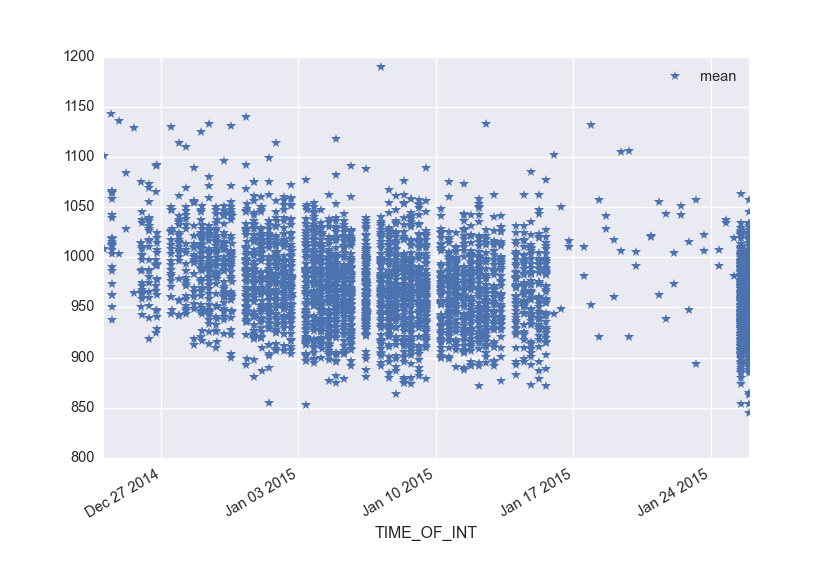

In [38]:
df[['mean']].plot(style='*')

<IPython.core.display.Javascript object>


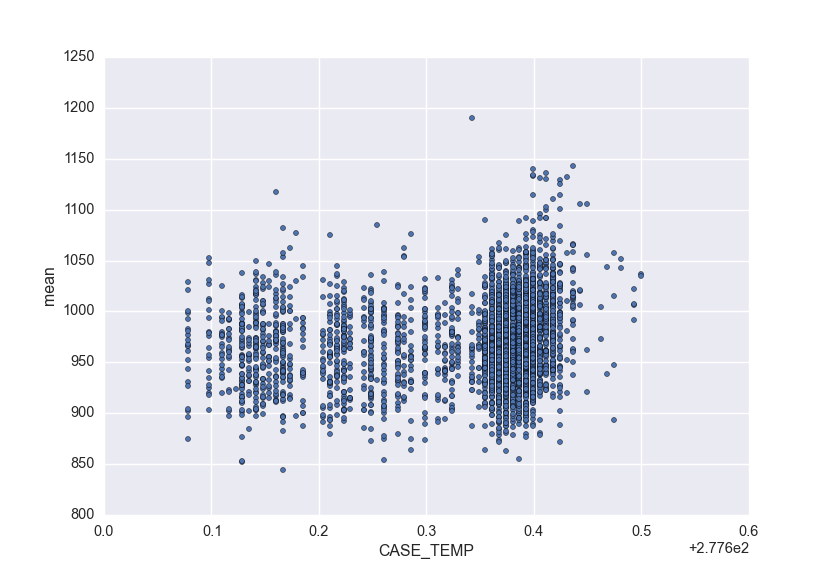

In [43]:
df.plot(kind='scatter', x='CASE_TEMP', y='mean')

<IPython.core.display.Javascript object>


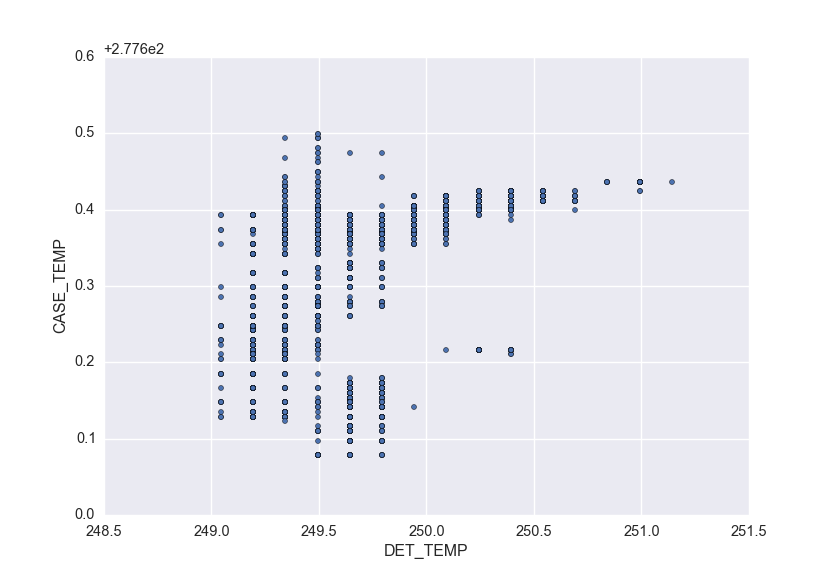

In [44]:
df.plot(kind='scatter',x='DET_TEMP', y='CASE_TEMP')

<IPython.core.display.Javascript object>


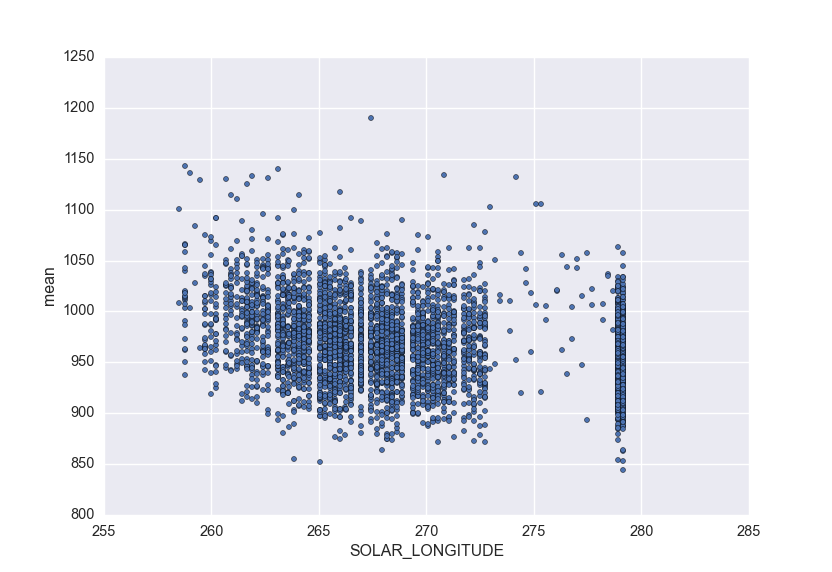

In [40]:
df.plot(kind='scatter', x='SOLAR_LONGITUDE',y='mean')

<IPython.core.display.Javascript object>


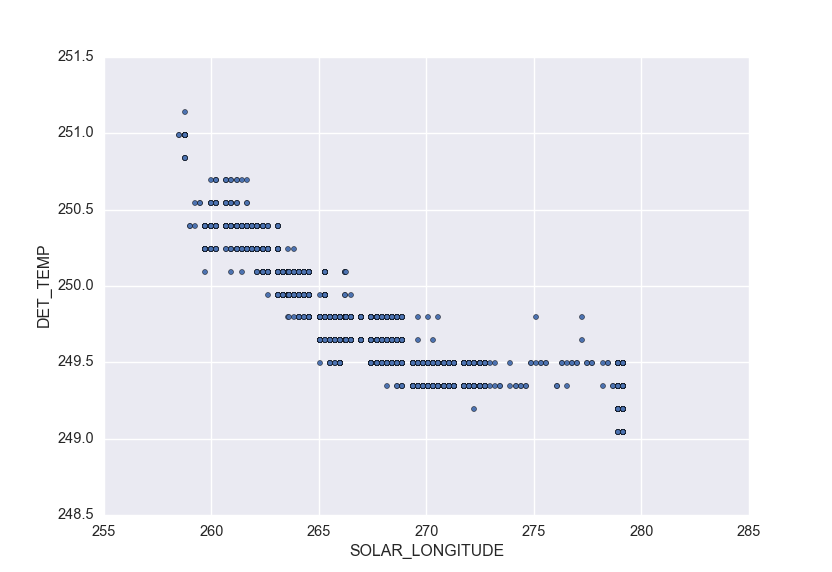

In [39]:
df.plot(kind='scatter', x='SOLAR_LONGITUDE', y='DET_TEMP')

In [32]:
from sklearn import linear_model, decomposition, datasets

In [33]:
pca = decomposition.RandomizedPCA()

In [34]:
df.columns

Index(['CASE_TEMP', 'DET_TEMP', 'FOV_DEG', 'LYA_CENTROID', 'MIRROR_DEG',
       'MIRROR_DN', 'MIR_DEG', 'NAXIS', 'NAXIS3', 'ORBIT_NUMBER', 'PROCESS',
       'PRODUCT_ID', 'SOLAR_LONGITUDE', 'mean', 'median', 'std'],
      dtype='object')

In [42]:
Xcols = 'case_temp det_temp fov_deg lya_centroid mirror_deg mirror_dn mir_deg solar_longitude'.upper().split()
Xcols += ['mean']
Xcols

['CASE_TEMP',
 'DET_TEMP',
 'FOV_DEG',
 'LYA_CENTROID',
 'MIRROR_DEG',
 'MIRROR_DN',
 'MIR_DEG',
 'SOLAR_LONGITUDE',
 'mean']

In [43]:
pca.fit(df[Xcols].values)

RandomizedPCA(copy=True, iterated_power=3, n_components=None,
       random_state=None, whiten=False)

In [49]:
plt.close('all')

<IPython.core.display.Javascript object>


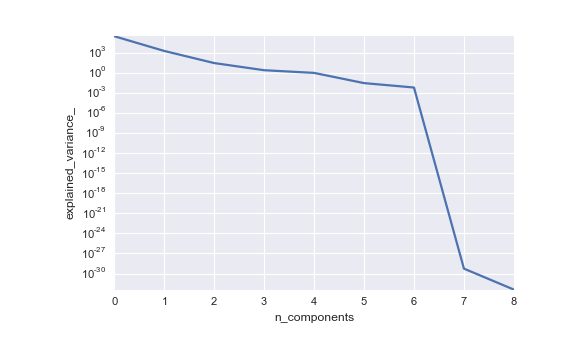

In [50]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([.2, .2, .7, .7])
plt.semilogy(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_components')
plt.ylabel('explained_variance_')